In [215]:
%run -n CNNModel.ipynb

Reading file...
	File directory from cwd is "../Data/"
	File name is "COMBINED_Type3-Freq10-Labeled_Motion-sessions_23-24_Fall.csv".
	File name read as "COMBINED_Type3-WithClassNum16-Freq10-BufferType0-BufferNum0-UserType0-UserID0-Labeled_Motion-sessions_23-24_Fall.csv".
Reading file...
	File directory from cwd is "../Data/"
	File name is "COMBINED_Type5-WithClassNum8-Freq10-Labeled_Motion-sessions_23-24_Fall.csv".
	File name read as "COMBINED_Type5-WithClassNum8-Freq10-BufferType0-BufferNum0-UserType0-UserID0-Labeled_Motion-sessions_23-24_Fall.csv".
click
[1 0 6 3 6 5 6 2 5 3 6 7 3 6 2 6 6 6 6 7 6 6 7 6 6 6 6 2 6 6 6 6 6 2 6 6 0
 6 6 6 7 3 6 7 7 2 7 2 6 2 6 6 6 7 6 0 7 6 6 3 2 6 7 6]
[1 6 6 3 6 6 6 2 5 0 6 7 3 7 2 6 6 5 6 7 6 6 7 6 6 6 6 2 6 5 6 6 6 6 6 6 0
 6 6 6 7 3 6 7 7 6 7 7 6 2 6 6 6 7 6 7 7 6 6 7 2 6 3 6]
click
[6 6 3 2 3 3 6 3 6 6 6 2 2 0 6 7 6 6 6 2 6 6 6 6 6 6 6 7 6 2 0 6 3 6 3 6 7
 6 6 6 2 3 1 6 6 6 6 6 6 6 6 6 4 3 6 6 1 2 6 7 2 6 6 6]
[6 6 3 2 3 3 6 0 6 6 6 2 2 0 6 7 6 6 6

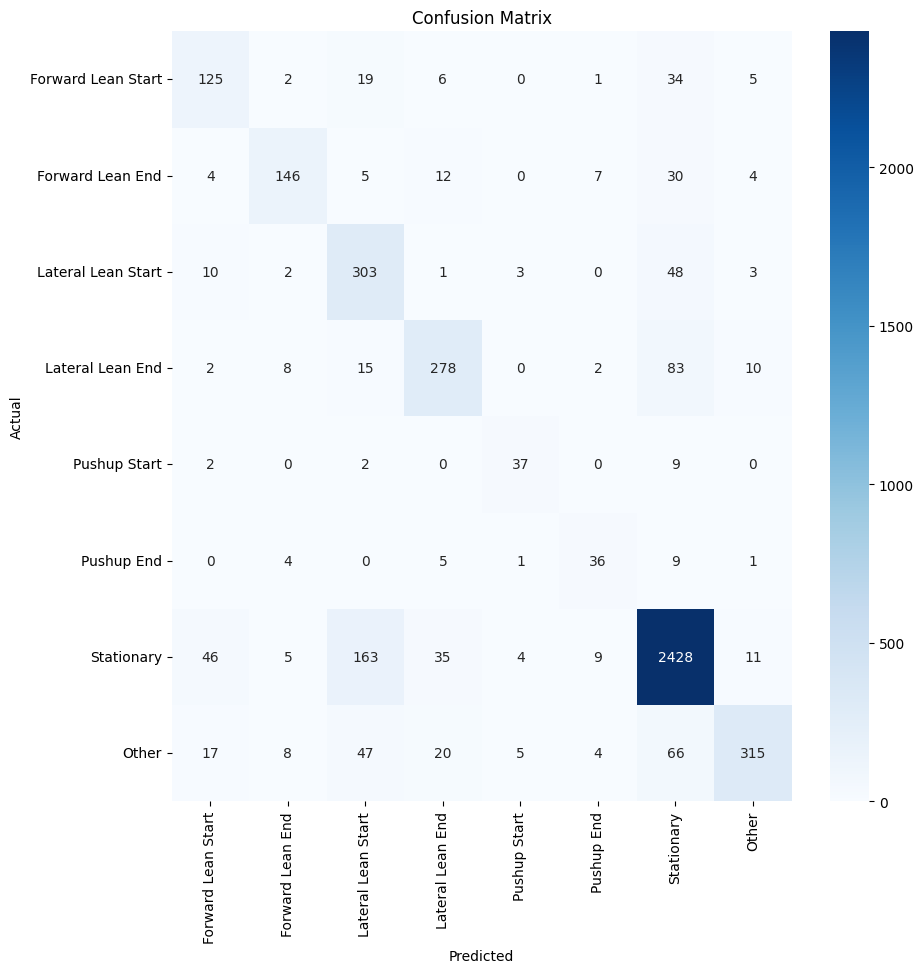

In [216]:
cnnmodel = JFNetModel(10)
cnnmodel.load_data(SKFileNameHandler.get_filename_for_classtype(3), False)
cnnmodel.load_model('./Old Model correction/models/model-Type3-FullDataset-AfterCorrection.pth', 3)
# '../model-5_29_2024-AdjustStatANDOtherToAdjMean_Type3.pth'
cnnmodel.change_io_specs(5, False)
cnnmodel.evaluate()